## 1. Import required libraries and read the data:

### Import the required libraries and read the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingClassifier
from mlxtend.regressor import StackingRegressor

from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
# Import dataset
df = pd.read_csv("download-2.csv") #reading the provided dataset
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


### Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
#Checking 1000 samples from the dataset
df.sample(1000)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
3350,3709315,11970,30731,10956.018750,59,BAT5547201,13.168007,A,C2,MORTGAGE,...,4.641885,0.487456,0,INDIVIDUAL,11,0,33,53870,3599,1
12990,2043747,8337,5152,7240.100286,59,BAT2522922,10.586868,B,A5,MORTGAGE,...,5.395640,0.650274,0,INDIVIDUAL,115,0,28,408188,11097,0
53307,5024832,31567,6783,32930.872870,59,BAT4271519,11.230588,B,B5,MORTGAGE,...,2.877448,1.232155,0,INDIVIDUAL,63,0,43,185012,81327,0
45415,8479015,15584,7800,7692.378434,59,BAT1780517,12.581349,E,D1,MORTGAGE,...,0.914671,1.369655,0,INDIVIDUAL,61,0,18,256795,9092,0
34642,3749572,12790,22916,13471.121830,59,BAT1780517,11.072618,B,C5,MORTGAGE,...,5.591425,0.928670,0,INDIVIDUAL,74,0,7,580914,19280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52002,9814899,27195,25366,26026.671870,59,BAT3873588,11.588364,A,G2,RENT,...,1.749198,0.721359,0,INDIVIDUAL,17,0,37,35624,47529,0
50865,7222385,16589,16038,12777.639370,36,BAT5547201,10.209856,C,B4,RENT,...,1.395530,0.809570,0,INDIVIDUAL,43,0,18,126101,45510,0
58334,64688869,17128,11206,34633.255780,59,BAT2252229,15.671112,B,B3,RENT,...,0.220594,0.543049,0,INDIVIDUAL,9,0,43,355499,6824,0
7395,58687364,19034,21247,16577.743240,59,BAT5525466,12.975798,A,C1,MORTGAGE,...,6.005396,0.744520,0,INDIVIDUAL,75,0,46,31210,43048,0


In [4]:
#Shape of the dataset
shape = df.shape
shape

(67463, 35)

In [5]:
#Size of the dataset
size = df.size
size

2361205

In [6]:
#Lets check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

- The dataset has 67463 entries and 35 columns
- Columns - Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title, Initial List Status and Application Type are of object type

## 2. Data cleansing and Exploratory data analysis:

#### Check if there are any duplicate records in the dataset? if any drop them, and check the percentage of missing values, if any? treat them with appropriate methods.

In [7]:
len(df[df.duplicated()]) #checking for any duplicate rows

0

- There are no duplicate records in the dataset

In [8]:
df.isnull().sum() #displays number of null values in each column

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [9]:
df.isnull().sum()/(len(df))*100 #displays the percentage of null values of each column

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

- There are no missing values in the dataset

#### Check summary statistics of the dataset, and write your key observations.

In [10]:
pd.set_option('display.max_columns', None)
#Checking the statistical summary 
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


- There are outliers in the following columns - Funded Amount,Funded Amount Investor,Interest Rate,Home Ownership,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest, Total Received Late Fee,Recoveries,Collection Recovery Fee, Last week Pay, Total Collection Amount,Total Current Balance and Total Revolving Credit Limit and it needs to be treated.

In [11]:
#User defined function to replace outliers using imputation as if they were missing values
def impute_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()

    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))

    return df

In [12]:
#Imputing outliers as if they were missing values using the user defined function 'impute_outliers_IQR'
df['Funded Amount'] = impute_outliers_IQR(df['Funded Amount'])
df['Funded Amount Investor'] = impute_outliers_IQR(df['Funded Amount Investor'])
df['Interest Rate'] = impute_outliers_IQR(df['Interest Rate'])
df['Home Ownership'] = impute_outliers_IQR(df['Home Ownership'])
df['Delinquency - two years'] = impute_outliers_IQR(df['Delinquency - two years'])
df['Inquires - six months'] = impute_outliers_IQR(df['Inquires - six months'])
df['Open Account'] = impute_outliers_IQR(df['Open Account'])
df['Public Record'] = impute_outliers_IQR(df['Public Record'])
df['Revolving Balance'] = impute_outliers_IQR(df['Revolving Balance'])
df['Revolving Utilities'] = impute_outliers_IQR(df['Revolving Utilities'])
df['Total Accounts'] = impute_outliers_IQR(df['Total Accounts'])
df['Total Received Interest'] = impute_outliers_IQR(df['Total Received Interest'])
df['Total Received Late Fee'] = impute_outliers_IQR(df['Total Received Late Fee'])
df['Recoveries'] = impute_outliers_IQR(df['Recoveries'])
df['Collection Recovery Fee'] = impute_outliers_IQR(df['Collection Recovery Fee'])
df['Last week Pay'] = impute_outliers_IQR(df['Last week Pay'])
df['Total Collection Amount'] = impute_outliers_IQR(df['Total Collection Amount'])
df['Total Current Balance'] = impute_outliers_IQR(df['Total Current Balance'])
df['Total Revolving Credit Limit'] = impute_outliers_IQR(df['Total Revolving Credit Limit'])
#Changing the datatype of Reviews again to int since after imputing the datatype got changed to float
#df['Reviews'] = df['Reviews'].astype(int)

In [13]:
df.describe() #statistical summary after treating the outliers

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,67463.000000,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,13797.242643,58.173814,11.705619,72770.213037,23.299241,0.074718,0.015074,12.948053,0.005543,6427.911929,52.889443,18.083589,1609.077766,0.100604,5.471297,0.772031,0.021301,71.163260,0.0,41.171793,146454.932662,20443.104308,0.092510
std,2.109155e+07,8367.865726,8150.992662,5521.164250,3.327441,3.496091,28761.216690,8.451824,0.137331,0.044383,3.924990,0.020511,4833.473061,22.539450,7.360604,1254.040623,0.241312,10.458744,0.383679,0.144385,43.315845,0.0,32.082151,113547.164192,15199.410225,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,617.000000,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,50379.000000,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,118369.000000,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,16397.065930,59.000000,14.001370,85911.012245,30.048400,0.000000,0.000000,14.266561,0.000000,8844.000000,69.177117,23.000000,2202.194852,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,213086.500000,29055.000000,0.000000
max,7.224578e+07,35000.000000,34999.000000,29771.015130,59.000000,21.537629,159010.435800,39.629862,0.327127,0.145754,25.000000,0.081437,21623.000000,100.880050,38.000000,5785.862617,1.143969,59.691578,1.832160,1.000000,161.000000,0.0,146.467990,495330.000000,68118.000000,1.000000


#### Drop the columns which you think redundant for the analysis.

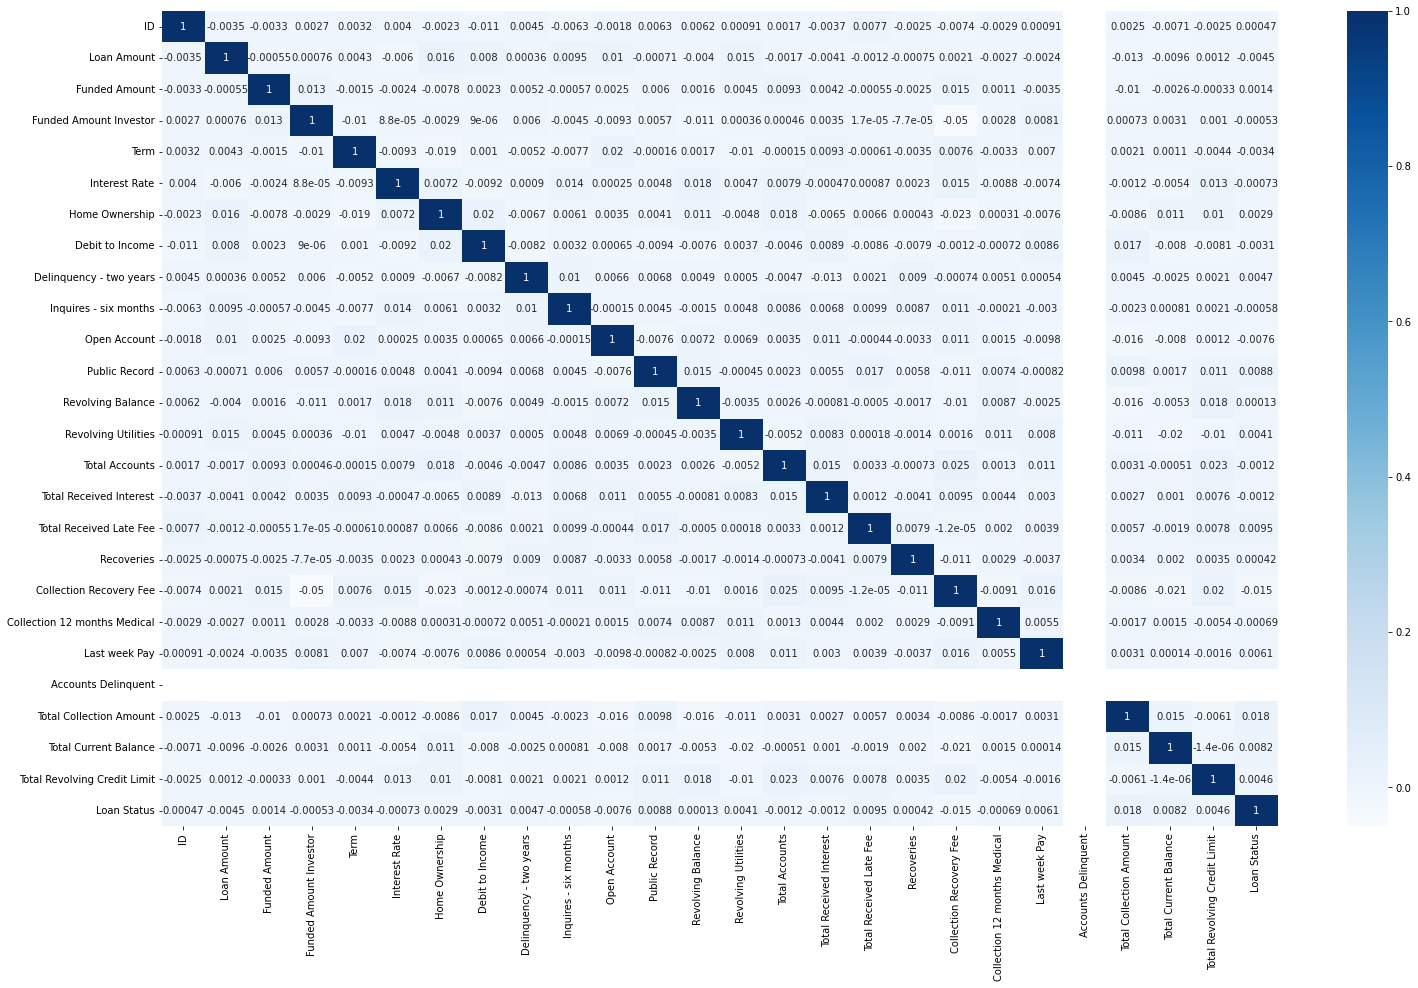

In [14]:
## lets visualize the correlation using heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

- No correlation between Accounts Delinquent and any of the features. Hence this feature can be dropped.

In [15]:
df = df.drop('ID',axis=1)
df #dataset without customer id

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236.0,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,80541.502522,Not Verified,n,Debt Consolidation,16.284758,0.327127,0.000000,13.000000,0.000000,7699.342425,74.932551,7.0,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49.0,0,31.00000,311301.0,6619.0,0
1,3609,11940.0,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.921000,Source Verified,n,Debt consolidation,15.412409,0.000000,0.000000,12.000000,0.000000,812.000000,78.297186,13.0,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109.0,0,53.00000,182610.0,20885.0,0
2,28276,9311.0,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.691050,Source Verified,n,Debt Consolidation,28.137619,0.000000,0.000000,14.000000,0.000000,1843.000000,2.073040,20.0,w,863.324396,1.143969,4.316277,1.020075,0,INDIVIDUAL,66.0,0,34.00000,89801.0,26155.0,0
3,11170,6954.0,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.575900,Source Verified,n,Debt consolidation,18.043730,0.327127,0.000000,7.000000,0.000000,13819.000000,67.467951,12.0,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39.0,0,40.00000,9189.0,60214.0,0
4,16890,13226.0,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.825450,Source Verified,n,Credit card refinancing,17.209886,0.327127,0.145754,13.000000,0.081437,1544.000000,85.250761,22.0,w,129.239553,1.143969,59.691578,0.368953,0,INDIVIDUAL,18.0,0,146.46799,126029.0,22579.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848.0,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.150030,Verified,n,Credit card refinancing,28.105127,0.327127,0.000000,13.000000,0.000000,4112.000000,97.779389,19.0,w,1978.945960,0.023478,59.691578,0.865230,0,INDIVIDUAL,69.0,0,48.00000,181775.0,34301.0,1
67459,8323,11046.0,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.128170,Source Verified,n,Credit card refinancing,17.694279,0.000000,0.000000,12.000000,0.000000,9737.000000,15.690703,14.0,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14.0,0,37.00000,22692.0,8714.0,0
67460,15897,32921.0,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.969850,Verified,n,Lending loan,10.295774,0.000000,0.000000,7.000000,0.081437,2195.000000,1.500090,9.0,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137.0,0,17.00000,176857.0,42330.0,0
67461,16567,4975.0,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.835640,Not Verified,n,Debt consolidation,7.614624,0.000000,0.000000,14.000000,0.000000,1172.000000,68.481882,15.0,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73.0,0,61.00000,361339.0,39075.0,0


In [16]:
df = df.drop('Batch Enrolled',axis=1)
df #dataset without Batch Enrolled

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236.0,12329.36286,59,11.135007,B,C4,MORTGAGE,80541.502522,Not Verified,n,Debt Consolidation,16.284758,0.327127,0.000000,13.000000,0.000000,7699.342425,74.932551,7.0,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49.0,0,31.00000,311301.0,6619.0,0
1,3609,11940.0,12191.99692,59,12.237563,C,D3,RENT,39833.921000,Source Verified,n,Debt consolidation,15.412409,0.000000,0.000000,12.000000,0.000000,812.000000,78.297186,13.0,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109.0,0,53.00000,182610.0,20885.0,0
2,28276,9311.0,21603.22455,59,12.545884,F,D4,MORTGAGE,91506.691050,Source Verified,n,Debt Consolidation,28.137619,0.000000,0.000000,14.000000,0.000000,1843.000000,2.073040,20.0,w,863.324396,1.143969,4.316277,1.020075,0,INDIVIDUAL,66.0,0,34.00000,89801.0,26155.0,0
3,11170,6954.0,17877.15585,59,16.731201,C,C3,MORTGAGE,108286.575900,Source Verified,n,Debt consolidation,18.043730,0.327127,0.000000,7.000000,0.000000,13819.000000,67.467951,12.0,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39.0,0,40.00000,9189.0,60214.0,0
4,16890,13226.0,13539.92667,59,15.008300,C,D4,MORTGAGE,44234.825450,Source Verified,n,Credit card refinancing,17.209886,0.327127,0.145754,13.000000,0.081437,1544.000000,85.250761,22.0,w,129.239553,1.143969,59.691578,0.368953,0,INDIVIDUAL,18.0,0,146.46799,126029.0,22579.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848.0,13175.28583,59,9.408858,C,A4,MORTGAGE,83961.150030,Verified,n,Credit card refinancing,28.105127,0.327127,0.000000,13.000000,0.000000,4112.000000,97.779389,19.0,w,1978.945960,0.023478,59.691578,0.865230,0,INDIVIDUAL,69.0,0,48.00000,181775.0,34301.0,1
67459,8323,11046.0,15637.46301,59,9.972104,C,B3,RENT,65491.128170,Source Verified,n,Credit card refinancing,17.694279,0.000000,0.000000,12.000000,0.000000,9737.000000,15.690703,14.0,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14.0,0,37.00000,22692.0,8714.0,0
67460,15897,32921.0,12329.45775,59,19.650943,A,F3,MORTGAGE,34813.969850,Verified,n,Lending loan,10.295774,0.000000,0.000000,7.000000,0.081437,2195.000000,1.500090,9.0,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137.0,0,17.00000,176857.0,42330.0,0
67461,16567,4975.0,21353.68465,59,13.169095,D,E3,OWN,96938.835640,Not Verified,n,Debt consolidation,7.614624,0.000000,0.000000,14.000000,0.000000,1172.000000,68.481882,15.0,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73.0,0,61.00000,361339.0,39075.0,0


In [17]:
df = df.drop('Employment Duration',axis=1) # dropping since values of Employment Duration are misplaced in Home Ownership column
df #dataset without Employment Duration


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236.0,12329.36286,59,11.135007,B,C4,80541.502522,Not Verified,n,Debt Consolidation,16.284758,0.327127,0.000000,13.000000,0.000000,7699.342425,74.932551,7.0,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49.0,0,31.00000,311301.0,6619.0,0
1,3609,11940.0,12191.99692,59,12.237563,C,D3,39833.921000,Source Verified,n,Debt consolidation,15.412409,0.000000,0.000000,12.000000,0.000000,812.000000,78.297186,13.0,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109.0,0,53.00000,182610.0,20885.0,0
2,28276,9311.0,21603.22455,59,12.545884,F,D4,91506.691050,Source Verified,n,Debt Consolidation,28.137619,0.000000,0.000000,14.000000,0.000000,1843.000000,2.073040,20.0,w,863.324396,1.143969,4.316277,1.020075,0,INDIVIDUAL,66.0,0,34.00000,89801.0,26155.0,0
3,11170,6954.0,17877.15585,59,16.731201,C,C3,108286.575900,Source Verified,n,Debt consolidation,18.043730,0.327127,0.000000,7.000000,0.000000,13819.000000,67.467951,12.0,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39.0,0,40.00000,9189.0,60214.0,0
4,16890,13226.0,13539.92667,59,15.008300,C,D4,44234.825450,Source Verified,n,Credit card refinancing,17.209886,0.327127,0.145754,13.000000,0.081437,1544.000000,85.250761,22.0,w,129.239553,1.143969,59.691578,0.368953,0,INDIVIDUAL,18.0,0,146.46799,126029.0,22579.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848.0,13175.28583,59,9.408858,C,A4,83961.150030,Verified,n,Credit card refinancing,28.105127,0.327127,0.000000,13.000000,0.000000,4112.000000,97.779389,19.0,w,1978.945960,0.023478,59.691578,0.865230,0,INDIVIDUAL,69.0,0,48.00000,181775.0,34301.0,1
67459,8323,11046.0,15637.46301,59,9.972104,C,B3,65491.128170,Source Verified,n,Credit card refinancing,17.694279,0.000000,0.000000,12.000000,0.000000,9737.000000,15.690703,14.0,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14.0,0,37.00000,22692.0,8714.0,0
67460,15897,32921.0,12329.45775,59,19.650943,A,F3,34813.969850,Verified,n,Lending loan,10.295774,0.000000,0.000000,7.000000,0.081437,2195.000000,1.500090,9.0,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137.0,0,17.00000,176857.0,42330.0,0
67461,16567,4975.0,21353.68465,59,13.169095,D,E3,96938.835640,Not Verified,n,Debt consolidation,7.614624,0.000000,0.000000,14.000000,0.000000,1172.000000,68.481882,15.0,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73.0,0,61.00000,361339.0,39075.0,0


In [18]:
df = df.drop('Home Ownership',axis=1) # dropping since values of Home Ownership are misplaced in Employment Duration column
df #dataset without Home Ownership


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236.0,12329.36286,59,11.135007,B,C4,Not Verified,n,Debt Consolidation,16.284758,0.327127,0.000000,13.000000,0.000000,7699.342425,74.932551,7.0,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49.0,0,31.00000,311301.0,6619.0,0
1,3609,11940.0,12191.99692,59,12.237563,C,D3,Source Verified,n,Debt consolidation,15.412409,0.000000,0.000000,12.000000,0.000000,812.000000,78.297186,13.0,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109.0,0,53.00000,182610.0,20885.0,0
2,28276,9311.0,21603.22455,59,12.545884,F,D4,Source Verified,n,Debt Consolidation,28.137619,0.000000,0.000000,14.000000,0.000000,1843.000000,2.073040,20.0,w,863.324396,1.143969,4.316277,1.020075,0,INDIVIDUAL,66.0,0,34.00000,89801.0,26155.0,0
3,11170,6954.0,17877.15585,59,16.731201,C,C3,Source Verified,n,Debt consolidation,18.043730,0.327127,0.000000,7.000000,0.000000,13819.000000,67.467951,12.0,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39.0,0,40.00000,9189.0,60214.0,0
4,16890,13226.0,13539.92667,59,15.008300,C,D4,Source Verified,n,Credit card refinancing,17.209886,0.327127,0.145754,13.000000,0.081437,1544.000000,85.250761,22.0,w,129.239553,1.143969,59.691578,0.368953,0,INDIVIDUAL,18.0,0,146.46799,126029.0,22579.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848.0,13175.28583,59,9.408858,C,A4,Verified,n,Credit card refinancing,28.105127,0.327127,0.000000,13.000000,0.000000,4112.000000,97.779389,19.0,w,1978.945960,0.023478,59.691578,0.865230,0,INDIVIDUAL,69.0,0,48.00000,181775.0,34301.0,1
67459,8323,11046.0,15637.46301,59,9.972104,C,B3,Source Verified,n,Credit card refinancing,17.694279,0.000000,0.000000,12.000000,0.000000,9737.000000,15.690703,14.0,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14.0,0,37.00000,22692.0,8714.0,0
67460,15897,32921.0,12329.45775,59,19.650943,A,F3,Verified,n,Lending loan,10.295774,0.000000,0.000000,7.000000,0.081437,2195.000000,1.500090,9.0,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137.0,0,17.00000,176857.0,42330.0,0
67461,16567,4975.0,21353.68465,59,13.169095,D,E3,Not Verified,n,Debt consolidation,7.614624,0.000000,0.000000,14.000000,0.000000,1172.000000,68.481882,15.0,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73.0,0,61.00000,361339.0,39075.0,0


In [19]:
df = df.drop('Accounts Delinquent',axis=1) # dropping since it does not have any correlation with any other feature
df #dataset without Accounts Delinquent


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236.0,12329.36286,59,11.135007,B,C4,Not Verified,n,Debt Consolidation,16.284758,0.327127,0.000000,13.000000,0.000000,7699.342425,74.932551,7.0,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49.0,31.00000,311301.0,6619.0,0
1,3609,11940.0,12191.99692,59,12.237563,C,D3,Source Verified,n,Debt consolidation,15.412409,0.000000,0.000000,12.000000,0.000000,812.000000,78.297186,13.0,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109.0,53.00000,182610.0,20885.0,0
2,28276,9311.0,21603.22455,59,12.545884,F,D4,Source Verified,n,Debt Consolidation,28.137619,0.000000,0.000000,14.000000,0.000000,1843.000000,2.073040,20.0,w,863.324396,1.143969,4.316277,1.020075,0,INDIVIDUAL,66.0,34.00000,89801.0,26155.0,0
3,11170,6954.0,17877.15585,59,16.731201,C,C3,Source Verified,n,Debt consolidation,18.043730,0.327127,0.000000,7.000000,0.000000,13819.000000,67.467951,12.0,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39.0,40.00000,9189.0,60214.0,0
4,16890,13226.0,13539.92667,59,15.008300,C,D4,Source Verified,n,Credit card refinancing,17.209886,0.327127,0.145754,13.000000,0.081437,1544.000000,85.250761,22.0,w,129.239553,1.143969,59.691578,0.368953,0,INDIVIDUAL,18.0,146.46799,126029.0,22579.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848.0,13175.28583,59,9.408858,C,A4,Verified,n,Credit card refinancing,28.105127,0.327127,0.000000,13.000000,0.000000,4112.000000,97.779389,19.0,w,1978.945960,0.023478,59.691578,0.865230,0,INDIVIDUAL,69.0,48.00000,181775.0,34301.0,1
67459,8323,11046.0,15637.46301,59,9.972104,C,B3,Source Verified,n,Credit card refinancing,17.694279,0.000000,0.000000,12.000000,0.000000,9737.000000,15.690703,14.0,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14.0,37.00000,22692.0,8714.0,0
67460,15897,32921.0,12329.45775,59,19.650943,A,F3,Verified,n,Lending loan,10.295774,0.000000,0.000000,7.000000,0.081437,2195.000000,1.500090,9.0,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137.0,17.00000,176857.0,42330.0,0
67461,16567,4975.0,21353.68465,59,13.169095,D,E3,Not Verified,n,Debt consolidation,7.614624,0.000000,0.000000,14.000000,0.000000,1172.000000,68.481882,15.0,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73.0,61.00000,361339.0,39075.0,0


#### Perform necessary univariate and multivariate analysis.

#### Univariate analysis of all the categorical features using countplot with the hue of "Loan Status" column

In [20]:
### Categorical features in the dataset
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Grade', 'Sub Grade', 'Verification Status', 'Payment Plan',
       'Loan Title', 'Initial List Status', 'Application Type'],
      dtype='object')

In [21]:
df1 = df.sample(n=30000) #taking a sample of 30000 data to perform univariate analysis
df1

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
16557,19147,9476.0,4017.411647,58,11.212994,C,B2,Verified,n,Debt consolidation,35.506496,0.0,0.000000,11.0,0.0,1567.0,61.136852,17.0,w,886.033274,0.057385,0.005165,0.230832,0,INDIVIDUAL,130.0,54.0,49058.000000,10767.000000,0
34708,1962,24956.0,12326.642660,58,12.271120,C,D2,Not Verified,n,Debt consolidation,24.175930,0.0,0.000000,14.0,0.0,2296.0,59.797509,9.0,f,2529.564618,0.038164,1.367979,1.283588,0,INDIVIDUAL,33.0,41.0,20598.000000,30785.000000,0
30909,10213,6950.0,21139.144070,58,10.447993,C,A5,Not Verified,n,Credit card refinancing,20.278818,0.0,0.000000,9.0,0.0,95.0,74.517657,29.0,f,2068.992542,0.018433,0.762649,0.779755,0,INDIVIDUAL,61.0,32.0,159573.933638,12741.000000,0
36237,17560,22135.0,7411.694865,59,5.543810,C,B3,Not Verified,n,Debt consolidation,28.874683,0.0,0.000000,11.0,0.0,3087.0,37.776232,23.0,w,2149.910534,0.001251,3.027628,1.053680,0,INDIVIDUAL,37.0,24.0,275691.000000,5561.000000,0
31633,23909,9457.0,12791.897480,58,9.053503,A,B1,Not Verified,n,Debt consolidation,7.016183,0.0,0.000000,12.0,0.0,2148.0,82.571909,27.0,f,2068.992542,0.048441,1.070364,0.329366,0,INDIVIDUAL,81.0,43.0,30262.000000,6544.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14219,29271,4928.0,10675.779750,59,11.618650,C,A3,Source Verified,n,Credit card refinancing,23.213814,0.0,0.145754,13.0,0.0,964.0,49.979104,18.0,f,177.478265,0.077862,4.547556,0.486890,0,INDIVIDUAL,77.0,37.0,354898.000000,24772.000000,0
53985,8325,19749.0,12162.594450,59,7.704417,A,D2,Source Verified,n,Credit card refinancing,35.395493,0.0,0.000000,24.0,0.0,2714.0,58.711460,12.0,f,3287.790410,0.001690,0.307867,1.358956,0,INDIVIDUAL,161.0,36.0,82999.000000,23123.005544,1
14476,14705,10026.0,5830.460059,58,16.499601,C,B2,Not Verified,n,Home improvement,33.058879,0.0,0.000000,14.0,0.0,7315.0,24.838472,21.0,f,2426.688545,1.143969,2.055578,1.396048,0,INDIVIDUAL,95.0,15.0,127317.000000,9785.000000,0
51380,5464,7461.0,11864.447130,58,21.111975,A,B2,Verified,n,Credit card refinancing,34.726120,0.0,0.000000,12.0,0.0,7675.0,44.660550,29.0,f,238.934558,0.124113,59.691578,0.168506,0,INDIVIDUAL,116.0,44.0,40005.000000,6135.000000,0


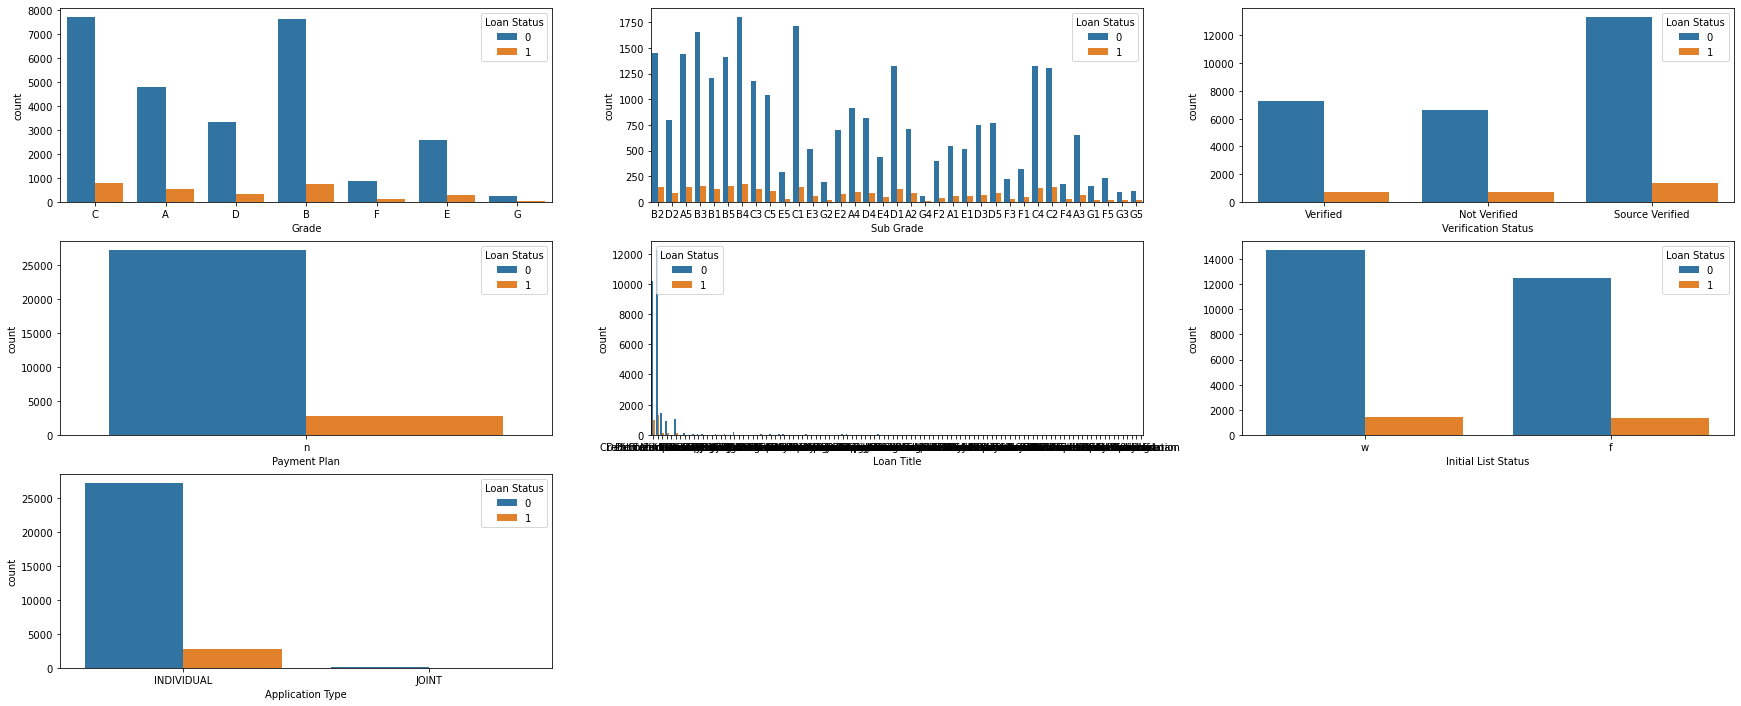

In [22]:
i = 1
plt.figure(figsize = (30,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'Loan Status' , data = df1)
    i +=1

- Customers who are not likely to be loan defaulters have higher payment plans.
- Customers with more individual accounts are not prone to be loan defaulters.
- Customers with verified source of income are more prone to be loan defaulters as compared to the verified and not verified statuses.
- Customers with waiting list status of the loan are not prone to be loan defaulters.
- Customers with Grade C are more prone to be loan defaulters.

#### Univariate analysis of Loan Amount using histogram

(array([ 3258.,  7891.,  8573.,  8106., 11404.,  9584.,  5524.,  3760.,
         5774.,  3589.]),
 array([ 1014. ,  4412.6,  7811.2, 11209.8, 14608.4, 18007. , 21405.6,
        24804.2, 28202.8, 31601.4, 35000. ]),
 <BarContainer object of 10 artists>)

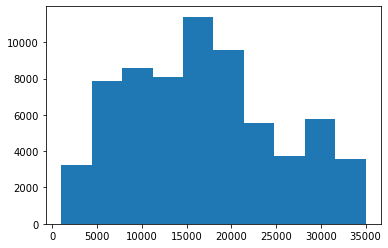

In [23]:
plt.hist(df["Loan Amount"])

- Highest loan amount which has been taken is between 15000 and 20000

#### Univariate analysis of Term using distplot

<AxesSubplot:xlabel='Term', ylabel='Density'>

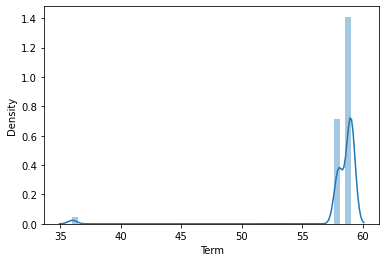

In [24]:
sns.distplot(df["Term"])

- 59 months is the highest amount of months a loan has been taken

#### Bivariate analysis of Loan Amount and Term using scatterplot

<AxesSubplot:xlabel='Loan Amount', ylabel='Term'>

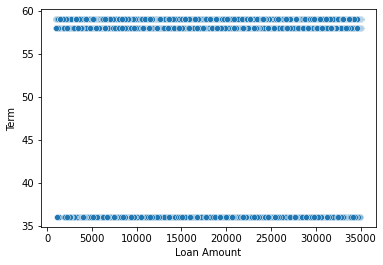

In [25]:
sns.scatterplot( df["Loan Amount"], df["Term"])

- Loans have been taken mostly for tenure of 35-40 months and 55-60 months

#### Multivariate analysis of Payment Plan and Recoveries based on Loan Status using barplot

<AxesSubplot:xlabel='Payment Plan', ylabel='Recoveries'>

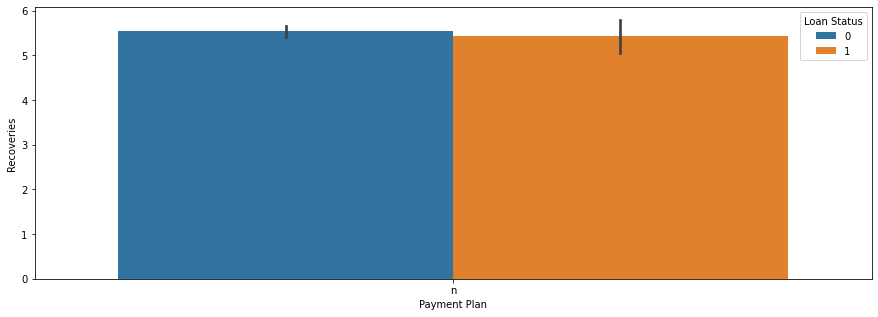

In [26]:
# figure size in inches
plt.figure(figsize=(15,5))

sns.barplot(df1['Payment Plan'], df1['Recoveries'], hue = df1["Loan Status"])

- Customers with higher payment plan have higher Recoveries and are less prone to be loan defaulters.

#### Check the distribution of the target column 'Loan Status', and comment on the class distribution.

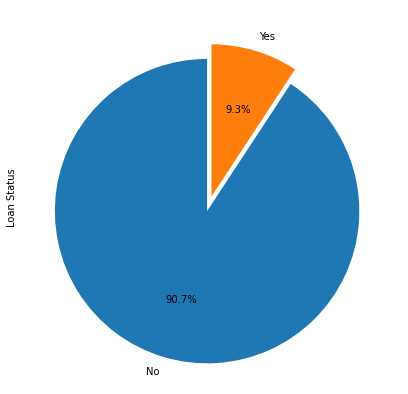

In [27]:
# Analyze the distribution of the target variable "Loan Status"
df['Loan Status'].value_counts().plot(kind='pie', labels=['No','Yes'], autopct='%1.1f%%',explode=[0.1,0],figsize=(20,7),startangle=90)
plt.show()

- We have 90.7% records of customers who are not loan defaulters and 9.3% customers who are loan defaulters.
- The target column 'Loan Status' is highly imbalanced.
- Most of the data are present for non defaulters as compared to defaulters

# Data preparation for model building:

#### Segregate the target and independent features

In [28]:
# separate independent variables in the X variable
X = df.drop('Loan Status',axis=1)
# separate target column (i.e. Churn) in the Y variable
Y = df['Loan Status']

####  Encode the categorical data.

In [29]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_Y=LabelEncoder()
Y = Encoder_Y.fit_transform(Y)

In [30]:
X.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,7094,22699,31227,2,31671,1,13,0,0,42,15528,1,0,11,0,7661,55565,3,1,52953,60456,25544,34487,0,0,49,30,51922,5050
1,1334,7866,30466,2,40164,2,17,1,0,49,13140,0,0,10,0,812,57965,9,0,21853,28602,24372,45192,0,0,109,52,38408,16786
2,22610,5260,55536,2,42199,5,18,1,0,42,46448,0,0,12,0,1842,434,17,1,23938,64006,42254,47758,0,0,66,33,23733,20267
3,8155,2937,50626,2,60233,2,12,1,0,49,20856,1,0,5,0,13038,48964,8,1,7389,34210,1074,31968,0,0,39,39,995,33922
4,13477,9079,37301,2,54090,2,18,1,0,38,18242,1,1,11,1,1543,62361,19,1,2563,64006,65085,11910,0,0,18,71,29936,17944


In [31]:
#df will be used for handling imbalanced data
df_copy = df.copy()
df_copy # df_copy has imbalanced data

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236.0,12329.36286,59,11.135007,B,C4,Not Verified,n,Debt Consolidation,16.284758,0.327127,0.000000,13.000000,0.000000,7699.342425,74.932551,7.0,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49.0,31.00000,311301.0,6619.0,0
1,3609,11940.0,12191.99692,59,12.237563,C,D3,Source Verified,n,Debt consolidation,15.412409,0.000000,0.000000,12.000000,0.000000,812.000000,78.297186,13.0,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109.0,53.00000,182610.0,20885.0,0
2,28276,9311.0,21603.22455,59,12.545884,F,D4,Source Verified,n,Debt Consolidation,28.137619,0.000000,0.000000,14.000000,0.000000,1843.000000,2.073040,20.0,w,863.324396,1.143969,4.316277,1.020075,0,INDIVIDUAL,66.0,34.00000,89801.0,26155.0,0
3,11170,6954.0,17877.15585,59,16.731201,C,C3,Source Verified,n,Debt consolidation,18.043730,0.327127,0.000000,7.000000,0.000000,13819.000000,67.467951,12.0,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39.0,40.00000,9189.0,60214.0,0
4,16890,13226.0,13539.92667,59,15.008300,C,D4,Source Verified,n,Credit card refinancing,17.209886,0.327127,0.145754,13.000000,0.081437,1544.000000,85.250761,22.0,w,129.239553,1.143969,59.691578,0.368953,0,INDIVIDUAL,18.0,146.46799,126029.0,22579.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848.0,13175.28583,59,9.408858,C,A4,Verified,n,Credit card refinancing,28.105127,0.327127,0.000000,13.000000,0.000000,4112.000000,97.779389,19.0,w,1978.945960,0.023478,59.691578,0.865230,0,INDIVIDUAL,69.0,48.00000,181775.0,34301.0,1
67459,8323,11046.0,15637.46301,59,9.972104,C,B3,Source Verified,n,Credit card refinancing,17.694279,0.000000,0.000000,12.000000,0.000000,9737.000000,15.690703,14.0,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14.0,37.00000,22692.0,8714.0,0
67460,15897,32921.0,12329.45775,59,19.650943,A,F3,Verified,n,Lending loan,10.295774,0.000000,0.000000,7.000000,0.081437,2195.000000,1.500090,9.0,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137.0,17.00000,176857.0,42330.0,0
67461,16567,4975.0,21353.68465,59,13.169095,D,E3,Not Verified,n,Debt consolidation,7.614624,0.000000,0.000000,14.000000,0.000000,1172.000000,68.481882,15.0,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73.0,61.00000,361339.0,39075.0,0


In [32]:
df_copy2 = df.copy()

#### Handle the imbalanced data using oversampling or under sampling approach, and check the distribution of the re-sampled target class.

#### Oversampling using SMOTE method

In [33]:
df_copy2 = df_copy2.sample(30000) #Taking a sample of 30000 data

In [34]:
# separate independent variables in the X variable
X_copy2 = df_copy2.drop('Loan Status',axis=1)
# separate target column (i.e. Churn) in the Y variable
Y_copy2 = df_copy2['Loan Status']

In [35]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X_copy2.columns:
    X_copy2[col] = Encoder_X.fit_transform(X_copy2[col])
Encoder_Y=LabelEncoder()
Y_copy2 = Encoder_Y.fit_transform(Y_copy2)

In [36]:
#SMOTE method to upsample smaller class
print("Before UpSampling, counts of label '1': {}".format(sum(Y_copy2==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(Y_copy2==0)))

from imblearn.over_sampling import SMOTE
#Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   
X_train_res2, y_train_res2 = sm.fit_resample(X_copy2, Y_copy2.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res2==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res2==0)))

print('After UpSampling, the shape of train_X: {}'.format(X_train_res2.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res2.shape))

Before UpSampling, counts of label '1': 2816
Before UpSampling, counts of label '0': 27184 

After UpSampling, counts of label '1': 27184
After UpSampling, counts of label '0': 27184 

After UpSampling, the shape of train_X: (54368, 29)
After UpSampling, the shape of train_y: (54368,) 



<AxesSubplot:ylabel='count'>

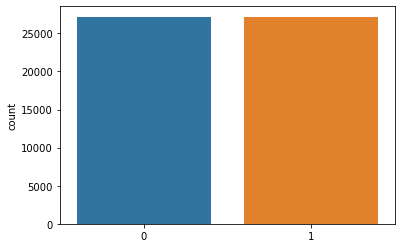

In [37]:
#Distribution of re-sampled target class "Loan Status"
sns.countplot(x = y_train_res2)

- After upsampling, the target class is now balanced

#### Split the data into train and test.

In [38]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res2, y_train_res2, test_size=0.3, random_state=42)

#### Select the K best features using wrapper or embedded methods.

#### Feature Selection using Forward Selection ( Wrapper Method )

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build Log Reg  to use in feature selection
logR = LogisticRegression(max_iter=1000)
# Build step forward feature selection
sfs1 = sfs(logR, k_features=15, forward=True, cv=15)
# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

In [85]:
sfs2=sfs1.get_metric_dict()

In [86]:
#Converting result of sf1 to dataframe
sfs2 = pd.DataFrame.from_dict(sfs2)
sfs2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
feature_idx,"(18,)","(11, 18)","(7, 11, 18)","(7, 11, 14, 18)","(3, 7, 11, 14, 18)","(3, 7, 11, 12, 14, 18)","(3, 5, 7, 11, 12, 14, 18)","(3, 5, 7, 11, 12, 14, 18, 23)","(3, 5, 7, 11, 12, 14, 17, 18, 23)","(3, 5, 7, 11, 12, 13, 14, 17, 18, 23)","(3, 5, 7, 11, 12, 13, 14, 17, 18, 23, 24)","(3, 5, 7, 11, 12, 13, 14, 17, 18, 23, 24, 25)","(3, 5, 7, 8, 11, 12, 13, 14, 17, 18, 23, 24, 25)","(3, 5, 7, 8, 11, 12, 13, 14, 17, 18, 23, 24, 2...","(3, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 23, 24..."
cv_scores,"[0.6245074862096138, 0.6130811662726556, 0.619...","[0.6469661150512215, 0.644602048857368, 0.6503...","[0.6481481481481481, 0.66548463356974, 0.66298...","[0.6564223798266351, 0.6556343577620173, 0.676...","[0.6686367218282112, 0.6658786446020488, 0.666...","[0.6753349093774625, 0.6836091410559496, 0.675...","[0.685973207249803, 0.6855791962174941, 0.6807...","[0.6879432624113475, 0.6895193065405831, 0.686...","[0.6887312844759653, 0.6914893617021277, 0.683...","[0.6840031520882585, 0.6910953506698188, 0.685...","[0.6840031520882585, 0.6914893617021277, 0.685...","[0.6840031520882585, 0.6918833727344366, 0.684...","[0.6843971631205674, 0.6914893617021277, 0.685...","[0.6843971631205674, 0.6907013396375099, 0.688...","[0.6828211189913318, 0.6887312844759653, 0.686..."
avg_score,0.624143,0.650524,0.663085,0.668787,0.675356,0.682687,0.690333,0.693171,0.693907,0.694643,0.69501,0.695168,0.695116,0.694905,0.694853
feature_names,"(Initial List Status,)","(Delinquency - two years, Initial List Status)","(Verification Status, Delinquency - two years,...","(Verification Status, Delinquency - two years,...","(Term, Verification Status, Delinquency - two ...","(Term, Verification Status, Delinquency - two ...","(Term, Grade, Verification Status, Delinquency...","(Term, Grade, Verification Status, Delinquency...","(Term, Grade, Verification Status, Delinquency...","(Term, Grade, Verification Status, Delinquency...","(Term, Grade, Verification Status, Delinquency...","(Term, Grade, Verification Status, Delinquency...","(Term, Grade, Verification Status, Payment Pla...","(Term, Grade, Verification Status, Payment Pla...","(Term, Grade, Sub Grade, Verification Status, ..."
ci_bound,0.006238,0.00504,0.00527,0.007219,0.005523,0.005646,0.005751,0.005403,0.005313,0.005288,0.005401,0.005526,0.005342,0.005364,0.006007
std_dev,0.01095,0.008847,0.009251,0.012673,0.009695,0.009911,0.010096,0.009485,0.009327,0.009283,0.009481,0.0097,0.009378,0.009417,0.010545
std_err,0.002927,0.002364,0.002472,0.003387,0.002591,0.002649,0.002698,0.002535,0.002493,0.002481,0.002534,0.002592,0.002506,0.002517,0.002818


In [87]:
# import required lbraries to plot the graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

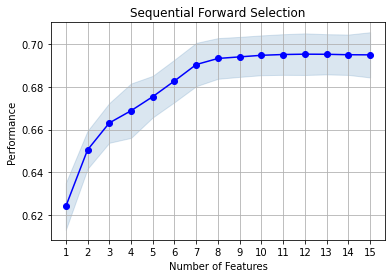

In [88]:
fig = plot_sfs(sfs2)

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [89]:
# Which features?
columnList = list(X)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[3, 5, 6, 7, 8, 11, 12, 13, 14, 17, 18, 23, 24, 25, 26]


In [90]:
# to fetch the names of the columns using the index
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['Term', 'Grade', 'Sub Grade', 'Verification Status', 'Payment Plan', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Total Accounts', 'Initial List Status', 'Collection 12 months Medical', 'Application Type', 'Last week Pay', 'Total Collection Amount']


#### Build full model with forward selection features

In [91]:
logR1 = LogisticRegression(max_iter=1000)
logR1.fit(X_train[subsetColumnList], y_train)

LogisticRegression(max_iter=1000)

In [178]:
X_train_fs = X_train
X_test_fs = X_test

In [93]:
y_train_pred = logR1.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % logR1.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.695


In [94]:
y_test_pred = logR1.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % logR1.score(X_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.691


In [95]:
prediction=logR1.predict(X_test[subsetColumnList])
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))

[[5340 2820]
 [2216 5935]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      8160
           1       0.68      0.73      0.70      8151

    accuracy                           0.69     16311
   macro avg       0.69      0.69      0.69     16311
weighted avg       0.69      0.69      0.69     16311



#### Feature Selection using Backward Elimination ( Wrapper Method )

In [98]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# Build LogReg  to use in feature selection
logR2 = LogisticRegression(solver='lbfgs', max_iter=100)
# Build backward feature selection
logreg_backward = sfs(logR2, k_features=15, forward=False, cv=15)
# Perform SFFS
sfs_backward = logreg_backward.fit(X_train.values, y_train)

In [99]:
sfs_backward1=sfs_backward.get_metric_dict()

In [100]:
#Converting result of sf1 to dataframe
sfs_backward1 = pd.DataFrame.from_dict(sfs_backward1)

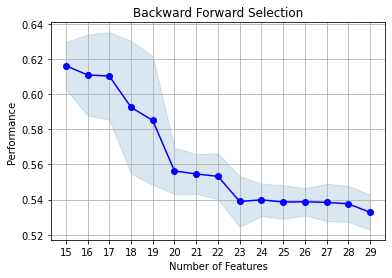

In [101]:
# import required lbraries to plot the graph
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs_backward1)

plt.title('Backward Forward Selection')
plt.grid()
plt.show()

In [102]:
columnList = list(X_copy2)
feat_cols = list(sfs_backward.k_feature_idx_)
print(feat_cols)

[1, 3, 5, 6, 7, 11, 12, 14, 15, 17, 18, 23, 26, 27, 28]


In [103]:
subsetColumnList1 = [columnList[i] for i in feat_cols] 
print(subsetColumnList1)

['Funded Amount', 'Term', 'Grade', 'Sub Grade', 'Verification Status', 'Delinquency - two years', 'Inquires - six months', 'Public Record', 'Revolving Balance', 'Total Accounts', 'Initial List Status', 'Collection 12 months Medical', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']


#### Build full model with backward selection features

In [104]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train[subsetColumnList1], y_train)

y_train_pred = logreg.predict(X_train[subsetColumnList1])
print('Training accuracy on selected features: %.3f' % logreg.score(X_train[subsetColumnList1], y_train))
y_test_pred = logreg.predict(X_test[subsetColumnList1])
print('Testing accuracy on selected features: %.3f' % logreg.score(X_test[subsetColumnList1], y_test))

Training accuracy on selected features: 0.671
Testing accuracy on selected features: 0.665


 - The Forward selection gave an accuracy of 0.691 while the Backward Elimination gave an accuracy of 0.665. Hence, Forward Selection is giving a better accuracy.

#### Feature Selection using Embedded Methods (Regularization)

In [105]:
# Building a normal regression model using logistic regression

regression_model = LogisticRegression(max_iter=1000)
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Loan Amount is 8.966942651153094e-06
The coefficient for Funded Amount is 8.22249125071637e-06
The coefficient for Funded Amount Investor is 4.38947894492032e-06
The coefficient for Term is -0.04536533524073274
The coefficient for Interest Rate is 2.9606700017077606e-06
The coefficient for Grade is -0.08904371960794288
The coefficient for Sub Grade is 0.00034226032624056857
The coefficient for Verification Status is -0.08062399508710143
The coefficient for Payment Plan is 0.0
The coefficient for Loan Title is 0.001096442715706442
The coefficient for Debit to Income is 8.085164369487576e-07
The coefficient for Delinquency - two years is -0.044448030221457054
The coefficient for Inquires - six months is -0.024638281682965474
The coefficient for Open Account is -0.07521506199414721
The coefficient for Public Record is -0.01712058456642918
The coefficient for Revolving Balance is 2.2398850561740836e-05
The coefficient for Revolving Utilities is 6.890227788596869e-06
The

In [106]:
# Create a regularized RIDGE model and note the coefficients
# Building ridge regression model
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-2.54705330e-07 -5.74079589e-07 -2.75809771e-08 -1.70250325e-01
  -1.33311486e-07 -7.44883797e-02 -1.92916352e-03 -2.11063979e-01
   0.00000000e+00 -1.92280311e-03 -2.05814390e-06 -4.45438468e-01
  -5.39086070e-01 -1.26433808e-02 -5.38002456e-01  5.53088883e-06
   2.47993649e-06 -5.25474433e-03 -3.95337833e-01 -3.33213691e-07
  -2.57304904e-06 -9.32251542e-07 -2.61977617e-06 -5.69904786e-01
  -6.82996477e-01  2.44018615e-05  1.71013846e-03 -4.44728858e-07
  -9.57619443e-07]]


In [107]:
# Comparing Ridge and Logistic regression scores
coef_df = pd.DataFrame(
    {'Columns': X_train.columns,
     'Logistic Regression': list(regression_model.coef_[0]),
     'Ridge Regression': list(ridge.coef_[0])
    })
coef_df

,Columns,Logistic Regression,Ridge Regression
0,Loan Amount,8.966943e-06,-2.547053e-07
1,Funded Amount,8.222491e-06,-5.740796e-07
2,Funded Amount Investor,4.389479e-06,-2.758098e-08
3,Term,-4.536534e-02,-1.702503e-01
4,Interest Rate,2.960670e-06,-1.333115e-07
5,Grade,-8.904372e-02,-7.448838e-02
6,Sub Grade,3.422603e-04,-1.929164e-03
7,Verification Status,-8.062400e-02,-2.110640e-01
8,Payment Plan,0.000000e+00,0.000000e+00
9,Loan Title,1.096443e-03,-1.922803e-03


In [108]:
# Print accuracy of logistic regression model 
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.5726410384423365
0.5713935381031205


In [109]:
prediction_reg = regression_model.predict(X_test)
prediction_reg

array([0, 1, 1, ..., 1, 1, 0])

In [110]:
print(metrics.confusion_matrix(y_test, prediction_reg))
print(metrics.classification_report(y_test, prediction_reg))

[[4547 3613]
 [3378 4773]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      8160
           1       0.57      0.59      0.58      8151

    accuracy                           0.57     16311
   macro avg       0.57      0.57      0.57     16311
weighted avg       0.57      0.57      0.57     16311



In [111]:
# Print accuracy of ridge regression model
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6941167196573561
0.6900864447305499


In [112]:
prediction_ridge = ridge.predict(X_test)
prediction_ridge

array([0, 1, 0, ..., 1, 0, 0])

In [113]:
print(metrics.confusion_matrix(y_test, prediction_ridge))
print(metrics.classification_report(y_test, prediction_ridge))

[[5264 2896]
 [2159 5992]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      8160
           1       0.67      0.74      0.70      8151

    accuracy                           0.69     16311
   macro avg       0.69      0.69      0.69     16311
weighted avg       0.69      0.69      0.69     16311



- Use of embedded methods (Ridge regression) gives better accuracy than a normal regression model.
- Out of all the feature selection methods, Forward Selection gives a better accuracy.

#### Undersampling using RandomUnderSampler

In [114]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X,Y)
y_rus.shape

(12482,)

In [115]:
print("Before Down Sampling, counts of label '1': {}".format(sum(Y==1)))
print("Before Down Sampling, counts of label '0': {} \n".format(sum(Y==0)))

Before Down Sampling, counts of label '1': 6241
Before Down Sampling, counts of label '0': 61222 



In [116]:
print("After Down Sampling, counts of label '1': {}".format(sum(y_rus==1)))
print("After Down Sampling, counts of label '0': {} \n".format(sum(y_rus==0)))

print('After Down Sampling, the shape of train_X: {}'.format(X_rus.shape))
print('After Down Sampling, the shape of train_y: {} \n'.format(y_rus.shape))

After Down Sampling, counts of label '1': 6241
After Down Sampling, counts of label '0': 6241 

After Down Sampling, the shape of train_X: (12482, 29)
After Down Sampling, the shape of train_y: (12482,) 



<AxesSubplot:ylabel='count'>

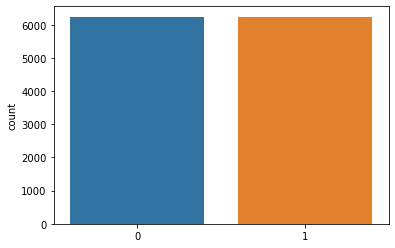

In [117]:
#Distribution of re-sampled target class "Loan Status"
sns.countplot(x = y_rus)

- After undersampling, the target class is now balanced

In [118]:
# fit model with Logistic Regression on downsampled data 
from sklearn import metrics
model=LogisticRegression(max_iter=1000)
model.fit(X_rus, y_rus)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.540555453375023
[[1939 6221]
 [1273 6878]]
              precision    recall  f1-score   support

           0       0.60      0.24      0.34      8160
           1       0.53      0.84      0.65      8151

    accuracy                           0.54     16311
   macro avg       0.56      0.54      0.49     16311
weighted avg       0.56      0.54      0.49     16311



- Upsampled data gave better accuracy compared to downsampled data

In [119]:
# Create a regularized RIDGE model and note the coefficients
# Building ridge regression model
from sklearn.linear_model import RidgeClassifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_rus, y_rus)
print ("Ridge model:", (ridge_model.coef_))

Ridge model: [[-5.43866181e-07  2.45475648e-07 -1.94594453e-07  4.18890234e-02
   5.99638933e-07  1.15196274e-02 -6.42126689e-05  6.23797205e-03
   0.00000000e+00  2.45179821e-04 -4.25114776e-07  4.39622629e-02
  -1.62504811e-02 -4.37919746e-03  7.52706202e-02  2.51803476e-08
   7.86751732e-07 -6.63478338e-04 -5.15337781e-02  3.54289083e-07
  -7.98016228e-07  1.34990162e-06 -1.30581865e-06 -4.73667411e-02
   1.82396323e-01  1.59786257e-04  2.44616504e-03  5.78820587e-07
   1.26833476e-06]]


In [120]:
# Print accuracy of ridge regression model
print(ridge_model.score(X_rus, y_rus))
print(ridge_model.score(X_test, y_test))

0.5287614164396731
0.4821899331739317


- Downsampled data with Ridge regression gives poor accuracy with high variance.
- Hence, we can choose to upsample data for better accuracy of the model

# Model Building and evaluation:

#### Build a base model using the Original Imbalanced data.

In [121]:
df_copy # Original imbalanced data

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236.0,12329.36286,59,11.135007,B,C4,Not Verified,n,Debt Consolidation,16.284758,0.327127,0.000000,13.000000,0.000000,7699.342425,74.932551,7.0,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49.0,31.00000,311301.0,6619.0,0
1,3609,11940.0,12191.99692,59,12.237563,C,D3,Source Verified,n,Debt consolidation,15.412409,0.000000,0.000000,12.000000,0.000000,812.000000,78.297186,13.0,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109.0,53.00000,182610.0,20885.0,0
2,28276,9311.0,21603.22455,59,12.545884,F,D4,Source Verified,n,Debt Consolidation,28.137619,0.000000,0.000000,14.000000,0.000000,1843.000000,2.073040,20.0,w,863.324396,1.143969,4.316277,1.020075,0,INDIVIDUAL,66.0,34.00000,89801.0,26155.0,0
3,11170,6954.0,17877.15585,59,16.731201,C,C3,Source Verified,n,Debt consolidation,18.043730,0.327127,0.000000,7.000000,0.000000,13819.000000,67.467951,12.0,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39.0,40.00000,9189.0,60214.0,0
4,16890,13226.0,13539.92667,59,15.008300,C,D4,Source Verified,n,Credit card refinancing,17.209886,0.327127,0.145754,13.000000,0.081437,1544.000000,85.250761,22.0,w,129.239553,1.143969,59.691578,0.368953,0,INDIVIDUAL,18.0,146.46799,126029.0,22579.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848.0,13175.28583,59,9.408858,C,A4,Verified,n,Credit card refinancing,28.105127,0.327127,0.000000,13.000000,0.000000,4112.000000,97.779389,19.0,w,1978.945960,0.023478,59.691578,0.865230,0,INDIVIDUAL,69.0,48.00000,181775.0,34301.0,1
67459,8323,11046.0,15637.46301,59,9.972104,C,B3,Source Verified,n,Credit card refinancing,17.694279,0.000000,0.000000,12.000000,0.000000,9737.000000,15.690703,14.0,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14.0,37.00000,22692.0,8714.0,0
67460,15897,32921.0,12329.45775,59,19.650943,A,F3,Verified,n,Lending loan,10.295774,0.000000,0.000000,7.000000,0.081437,2195.000000,1.500090,9.0,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137.0,17.00000,176857.0,42330.0,0
67461,16567,4975.0,21353.68465,59,13.169095,D,E3,Not Verified,n,Debt consolidation,7.614624,0.000000,0.000000,14.000000,0.000000,1172.000000,68.481882,15.0,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73.0,61.00000,361339.0,39075.0,0


In [122]:
# separate independent variables in the X variable
X_copy = df_copy.drop('Loan Status',axis=1)
# separate target column (i.e. Churn) in the Y variable
Y_copy = df_copy['Loan Status']

In [123]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X_copy.columns:
    X_copy[col] = Encoder_X.fit_transform(X_copy[col])
Encoder_Y=LabelEncoder()
Y_copy = Encoder_Y.fit_transform(Y_copy)

In [124]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_copy, Y_copy, test_size=0.3, random_state=42)

In [125]:
X_train_1.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
10823,3169,16556,36009,1,31840,0,12,0,0,75,54194,0,0,12,0,9035,14776,14,0,44023,49689,58739,273,0,0,146,43,35610,6031
56039,15786,5537,58342,2,16235,4,4,1,0,38,27545,1,0,6,0,13968,62944,23,0,18413,27788,65085,45453,0,0,10,57,34788,33197
32457,24309,19403,35878,1,24858,1,17,1,0,49,54406,0,0,8,0,604,43281,17,1,1008,30901,37564,51252,0,0,50,44,16842,19684
43496,15497,1427,20677,2,13250,1,13,1,0,38,27379,0,0,18,0,9912,11601,5,1,23801,44322,59133,32092,0,0,25,35,32986,34273
50204,14756,10485,50703,2,18941,1,6,2,0,69,27633,1,0,9,1,11572,11997,3,1,5013,4601,21743,46035,0,0,86,43,34788,8671


In [126]:
#create an instance
regression_model = LogisticRegression(max_iter=1000)
#learning
regression_model.fit(X_train_1, y_train_1)

LogisticRegression(max_iter=1000)

In [127]:
# Train Accuracy
print('Train data Accuracy is: ',regression_model.score(X_train_1, y_train_1))

Train data Accuracy is:  0.9070811451804167


In [128]:
# Test Accuracy
print('Test data Accuracy is: ',regression_model.score(X_test_1, y_test_1))

Test data Accuracy is:  0.9084440930876031


In [129]:
prediction=regression_model.predict(X_test_1)
print(metrics.confusion_matrix(y_test_1, prediction))
print(metrics.classification_report(y_test_1, prediction))

[[18386     0]
 [ 1853     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     18386
           1       0.00      0.00      0.00      1853

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.83      0.91      0.86     20239



- The accuracy of the base model with imbalanced data is 0.9084

#### Try multiple models and tune their hyperparameters with appropriate methods and report the best performing model(use balanced data).

#### Model Building with Grid Search Hyper Parameter Tuning in RandomForestClassifier

In [180]:
# Define the set of parameters to be considered while implementing GridSearchCV in RandomForestClassifier
param_rf = {
    "bootstrap": [True, False], # values for boostrap can be either True or False
        "max_depth": (3, 30), # values of max_depth are integers from 3 to 30
        "n_estimators": (10, 60)
}

In [182]:
# Create an instance of GridSearchCV as model
model = GridSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1),param_rf,cv=5,n_jobs=-1,verbose=1)

#learning
model.fit(X_train_fs,y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",model.best_params_)

#evaluation(Accuracy)
print("Train data accuracy score: ", model.score(X_train_fs,y_train))
print("Test data accuracy score: ", model.score(X_test_fs,y_test))

prediction_1 = model.predict(X_test_fs) #prediction of GridSearch using hyperparameter tuning

#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_1,y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyper Parameters:
 {'bootstrap': False, 'max_depth': 30, 'n_estimators': 60}
Train data accuracy score:  0.9914339017789106
Test data accuracy score:  0.8929556740849733
Confusion Matrix:
 [[7428 1014]
 [ 732 7137]]


#### Model Building with Randomized Search CV Hyper Parameter Tuning in RandomForestClassifier

In [183]:
# Define the set of parameters to be considered while implementing RandomizedSearchCV in RandomForestClassifier
param_rf_random = {
    
    "bootstrap": [True, False], # values for boostrap can be either True or False
        "max_depth": (3, 30), # values of max_depth are integers from 3 to 30
        "n_estimators": (10, 60)
}

In [184]:
# Create an instance of RandomizedSearchCV as rf_random
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1),param_rf_random,cv = 5, verbose=1, n_jobs = -1)

#learning
rf_random.fit(X_train_fs, y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",rf_random.best_params_)

#evaluation(Accuracy)
print("Train data accuracy score: ", rf_random.score(X_train_fs,y_train))
print("Test data accuracy score: ", rf_random.score(X_test_fs,y_test))

prediction_2 = rf_random.predict(X_test_fs) #prediction of RandomizedSearchCV using hyperparameter tuning

#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_2,y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyper Parameters:
 {'n_estimators': 60, 'max_depth': 30, 'bootstrap': False}
Train data accuracy score:  0.9914339017789106
Test data accuracy score:  0.8929556740849733
Confusion Matrix:
 [[7428 1014]
 [ 732 7137]]


#### Model Building with Bayesian Optimization Hyper Parameter Tuning in RandomForestClassifier

In [185]:
!pip3 install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [186]:
search_space = {
        "bootstrap": [True, False], # values for boostrap can be either True or False
        "max_depth": (3, 30), # values of max_depth are integers from 3 to 30
        "n_estimators": (10, 60)
    }

In [187]:
forest_bayes_search = BayesSearchCV(RandomForestClassifier(random_state=0, n_jobs=-1), search_space, n_iter=32, # specify how many iterations
                                    scoring="accuracy", n_jobs=-1, cv=5)

forest_bayes_search.fit(X_train_fs, y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",forest_bayes_search.best_params_)

#evaluation(Accuracy)
print("Train data accuracy score: ", forest_bayes_search.score(X_train_fs,y_train))
print("Test data accuracy score: ", forest_bayes_search.score(X_test_fs,y_test))

prediction_3 = forest_bayes_search.predict(X_test_fs) #prediction of RandomSearch using hyperparameter tuning

#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_3,y_test))

Best Hyper Parameters:
 OrderedDict([('bootstrap', False), ('max_depth', 30), ('n_estimators', 60)])
Train data accuracy score:  0.9914339017789106
Test data accuracy score:  0.8929556740849733
Confusion Matrix:
 [[7428 1014]
 [ 732 7137]]


# Pipeline:

#### Build a pipeline and put all the above steps in the pipeline and fit the pipeline on train data and get predictions on the test data.

In [188]:
# Building a pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('algo', RandomForestClassifier(random_state=0, n_jobs=-1))])

#### Model Building with Grid Search Hyper Parameter Tuning in RandomForestClassifier ( With Pipeline )

In [189]:
# Define the set of parameters to be considered while implementing GridSearchCV in RandomForestClassifier
param_rf = {
    "algo__bootstrap": [True, False], # values for boostrap can be either True or False
        "algo__max_depth": (3, 30), # values of max_depth are integers from 3 to 30
        "algo__n_estimators": (10, 60)
}

In [191]:
# Create an instance of GridSearchCV as model
model = GridSearchCV(pipe,param_rf,cv=5,n_jobs=-1,verbose=1)

#learning
model.fit(X_train_fs,y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",model.best_params_)

#evaluation(Accuracy)
print("Train data accuracy score: ", model.score(X_train_fs,y_train))
print("Test data accuracy score: ", model.score(X_test_fs,y_test))

prediction_1 = model.predict(X_test_fs) #prediction of GridSearch using hyperparameter tuning

#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_1,y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyper Parameters:
 {'algo__bootstrap': False, 'algo__max_depth': 30, 'algo__n_estimators': 60}
Train data accuracy score:  0.9914339017789106
Test data accuracy score:  0.8930782907240512
Confusion Matrix:
 [[7431 1015]
 [ 729 7136]]


#### Model Building with Randomized Search CV Hyper Parameter Tuning in RandomForestClassifier ( With Pipeline )

In [192]:
# Define the set of parameters to be considered while implementing RandomizedSearchCV in RandomForestClassifier
param_rf_random = {
    
    "algo__bootstrap": [True, False], # values for boostrap can be either True or False
        "algo__max_depth": (3, 30), # values of max_depth are integers from 3 to 30
        "algo__n_estimators": (10, 60)
}

In [193]:
# Create an instance of RandomizedSearchCV as rf_random
rf_random = RandomizedSearchCV(pipe,param_rf_random,cv = 5, verbose=1, n_jobs = -1)

#learning
rf_random.fit(X_train_fs, y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",rf_random.best_params_)

#evaluation(Accuracy)
print("Train data accuracy score: ", rf_random.score(X_train_fs,y_train))
print("Test data accuracy score: ", rf_random.score(X_test_fs,y_test))

prediction_2 = model.predict(X_test_fs) #prediction of RandomizedSearchCV using hyperparameter tuning

#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_2,y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyper Parameters:
 {'algo__n_estimators': 60, 'algo__max_depth': 30, 'algo__bootstrap': False}
Train data accuracy score:  0.9914339017789106
Test data accuracy score:  0.8930782907240512
Confusion Matrix:
 [[7431 1015]
 [ 729 7136]]


#### Model Building with Bayesian Optimization Hyper Parameter Tuning in RandomForestClassifier ( With Pipeline )

In [194]:
search_space = {    "algo__bootstrap": [True, False], # values for boostrap can be either True or False
        "algo__max_depth": (3, 30), # values of max_depth are integers from 3 to 30
        "algo__n_estimators": (10, 60)
    }

In [195]:
forest_bayes_search = BayesSearchCV(pipe, search_space, n_iter=32, # specify how many iterations
                                    scoring="accuracy", n_jobs=-1, cv=5)

forest_bayes_search.fit(X_train_fs, y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",forest_bayes_search.best_params_)

#evaluation(Accuracy)
print("Train data accuracy score: ", forest_bayes_search.score(X_train_fs,y_train))
print("Test data accuracy score: ", forest_bayes_search.score(X_test_fs,y_test))

prediction_3 = model.predict(X_test_fs) #prediction of Bayesian Search using hyperparameter tuning

#evaluation(Confusion Matrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_3,y_test))

Best Hyper Parameters:
 OrderedDict([('algo__bootstrap', False), ('algo__max_depth', 30), ('algo__n_estimators', 60)])
Train data accuracy score:  0.9914339017789106
Test data accuracy score:  0.8930782907240512
Confusion Matrix:
 [[7431 1015]
 [ 729 7136]]


- With hyper parameter tuning, GridSearch, RandomizedSearchCV and Bayesian search provides an accuracy of 0.8931.

- Hence, we can select either of GridSearch, RandomizedSearchCV or Bayesian search method with an accuracy of 0.8931.

# Conclusions:

#### Compare the evaluation metrics of the base model and the tuned model and write your conclusion. Mention the steps taken to improve the performance of the model.

- The base model gives a training accuracy of 0.9070 and testing accuracy of 0.9084 with imbalanced data. However, after doing hyper parameter tuning, the training accuracy got better to 0.9914 but the testing accuracy reduced to 0.8931.

- To improve the performance of the model, oversampling and feature selection were done using Forward Selection, Backward Elimination and Ridge Regression. After that, hyper parameter tuning was performed using GridSearch, RandomizedSearchCV and Bayesian search to improve the accuracy of the model. 